In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# actual weight = 2 and actual bias = 0.9
x = np.linspace(0, 3, 120)
y = 2 * x + 0.9 + np.random.randn(*x.shape) * 0.3

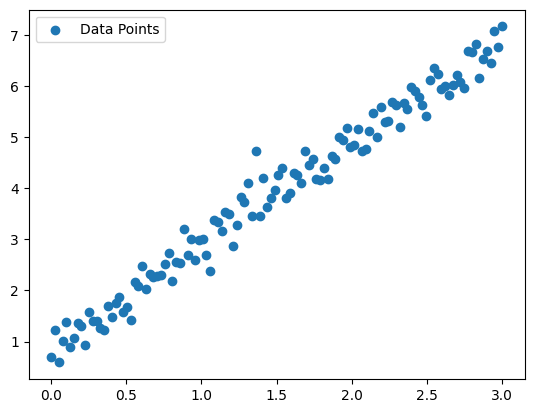

In [3]:
plt.scatter(x, y, label="Data Points")
plt.legend()

In [4]:
class LinearModel:
    def __init__(self):
        self.Weight = tf.Variable(-4.0)
        self.Bias = tf.Variable(-2.0)
        
    def __call__(self, x):
        return self.Weight * x + self.Bias

In [5]:
linear_model=LinearModel()

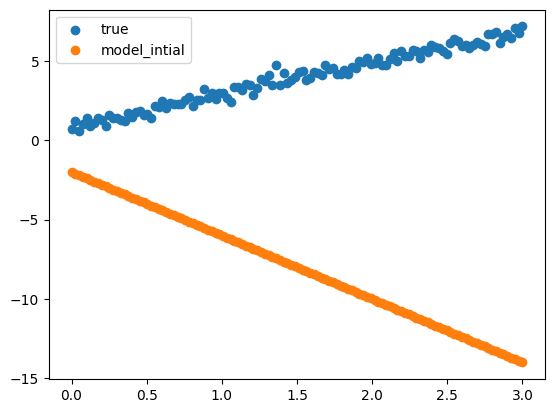

In [6]:
# actual weight = -4 and actual bias = -2
plt.scatter(x, y, label="true")
plt.scatter(x, linear_model(x), label="model_intial")# with initail values of w and b
plt.legend()

In [14]:
def loss(y, pred):
    return tf.reduce_mean(tf.square(y - pred))

def train(linear_model, x, y, lr=0.12):
    with tf.GradientTape() as t:
        current_loss = loss(y, linear_model(x))
    lr_weight, lr_bias = t.gradient(current_loss, [linear_model.Weight, linear_model.Bias])
    linear_model.Weight.assign_sub(lr * lr_weight)
    linear_model.Bias.assign_sub(lr * lr_bias)

In [8]:
# https://www.tensorflow.org/guide/autodiff

In [9]:
linear_model = LinearModel()
Weights, Biases = [], []
epochsTab=[]
Lossfunc=[]
epochs = 100
for epoch_count in range(epochs):
    Weights.append(linear_model.Weight.numpy()) 
    Biases.append(linear_model.Bias.numpy())
    real_loss = loss(y, linear_model(x))
    train(linear_model, x, y, lr=0.12)
    print(f"Epoch count {epoch_count}: Loss value: {real_loss.numpy()}")
    #keep epoch number and real loss
    epochsTab.append(epoch_count)
    Lossfunc.append(real_loss.numpy())

Epoch count 0: Loss value: 169.26397705078125
Epoch count 1: Loss value: 1.3099441528320312
Epoch count 2: Loss value: 0.09574489295482635
Epoch count 3: Loss value: 0.0858057513833046
Epoch count 4: Loss value: 0.08467306196689606
Epoch count 5: Loss value: 0.08370339125394821
Epoch count 6: Loss value: 0.08282498270273209
Epoch count 7: Loss value: 0.08202888071537018
Epoch count 8: Loss value: 0.08130740374326706
Epoch count 9: Loss value: 0.08065351843833923
Epoch count 10: Loss value: 0.08006090670824051
Epoch count 11: Loss value: 0.07952383160591125
Epoch count 12: Loss value: 0.07903709262609482
Epoch count 13: Loss value: 0.07859595865011215
Epoch count 14: Loss value: 0.07819616049528122
Epoch count 15: Loss value: 0.07783380895853043
Epoch count 16: Loss value: 0.0775054320693016
Epoch count 17: Loss value: 0.07720781862735748
Epoch count 18: Loss value: 0.07693810015916824
Epoch count 19: Loss value: 0.07669364660978317
Epoch count 20: Loss value: 0.07647211104631424
Epoch 

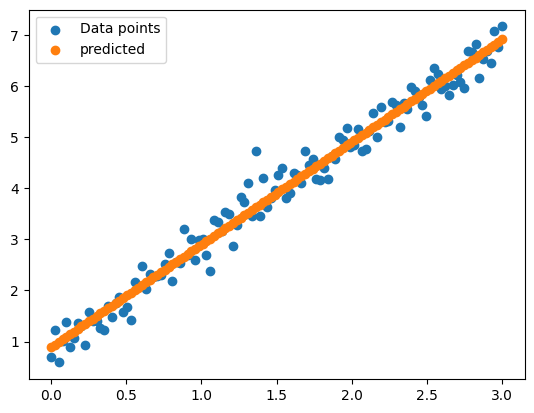

In [10]:
plt.scatter(x, y, label="Data points")
plt.scatter(x, linear_model(x), label="predicted")
plt.legend()

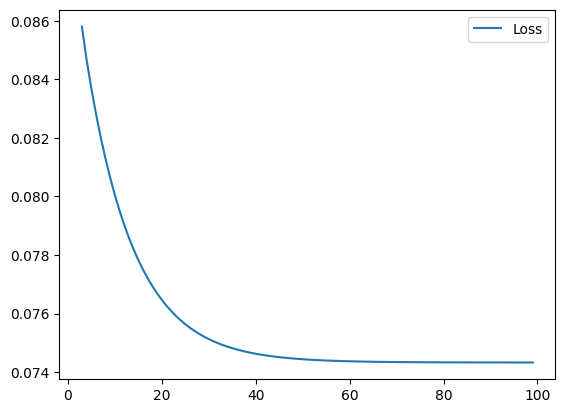

In [11]:
plt.plot(epochsTab[3:], Lossfunc[3:], label="Loss")
plt.legend()

In [12]:
# actual weight = 2 and actual bias = 0.9
x = np.linspace(0, 3, 120)
y = 2 * x**2 + 0.9 + np.random.randn(*x.shape) * 0.3

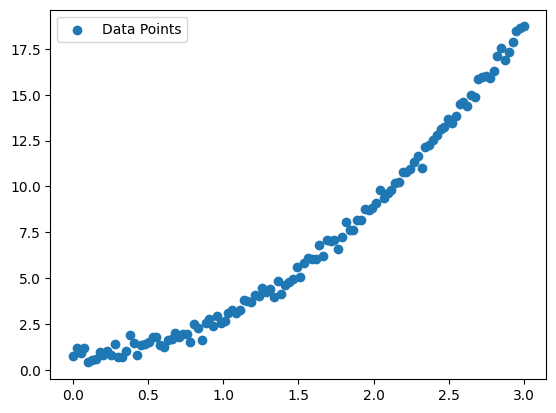

In [13]:
plt.scatter(x, y, label="Data Points")
plt.legend()